In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import joblib

# Load data
X_test = np.load('../data/processed/X_test.npy')
y_test = np.load('../data/processed/y_test.npy')

# Load all models
baseline_models = joblib.load('../results/models/baseline_models.pkl')
advanced_models = joblib.load('../results/models/advanced_models.pkl')

print("✓ All models loaded")
print(f"Baseline models: {len(baseline_models)}")
print(f"Advanced models: {len(advanced_models)}")

✓ All models loaded
Baseline models: 5
Advanced models: 3


In [2]:
# Combine all models
all_models = {**baseline_models, **advanced_models}

# Calculate metrics for all models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

all_results = {}
for name, model in all_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    all_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }

# Create results dataframe
results_df = pd.DataFrame(all_results).T.round(4)
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("="*70)
print("ALL MODELS COMPARISON - RANKED BY ROC-AUC")
print("="*70)
print(results_df)

ALL MODELS COMPARISON - RANKED BY ROC-AUC
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Naive Bayes            0.8525     0.7879  0.9286    0.8525   0.9481
Logistic Regression    0.8361     0.7812  0.8929    0.8333   0.9459
LightGBM               0.8689     0.8125  0.9286    0.8667   0.9459
Random Forest          0.8689     0.8125  0.9286    0.8667   0.9410
SVM                    0.8033     0.7500  0.8571    0.8000   0.9123
XGBoost                0.8197     0.7576  0.8929    0.8197   0.9048
Neural Network         0.7049     0.7083  0.6071    0.6538   0.7543
Decision Tree          0.6557     0.6000  0.7500    0.6667   0.6629


/opt/anaconda3/envs/medical_ai/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/medical_ai/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


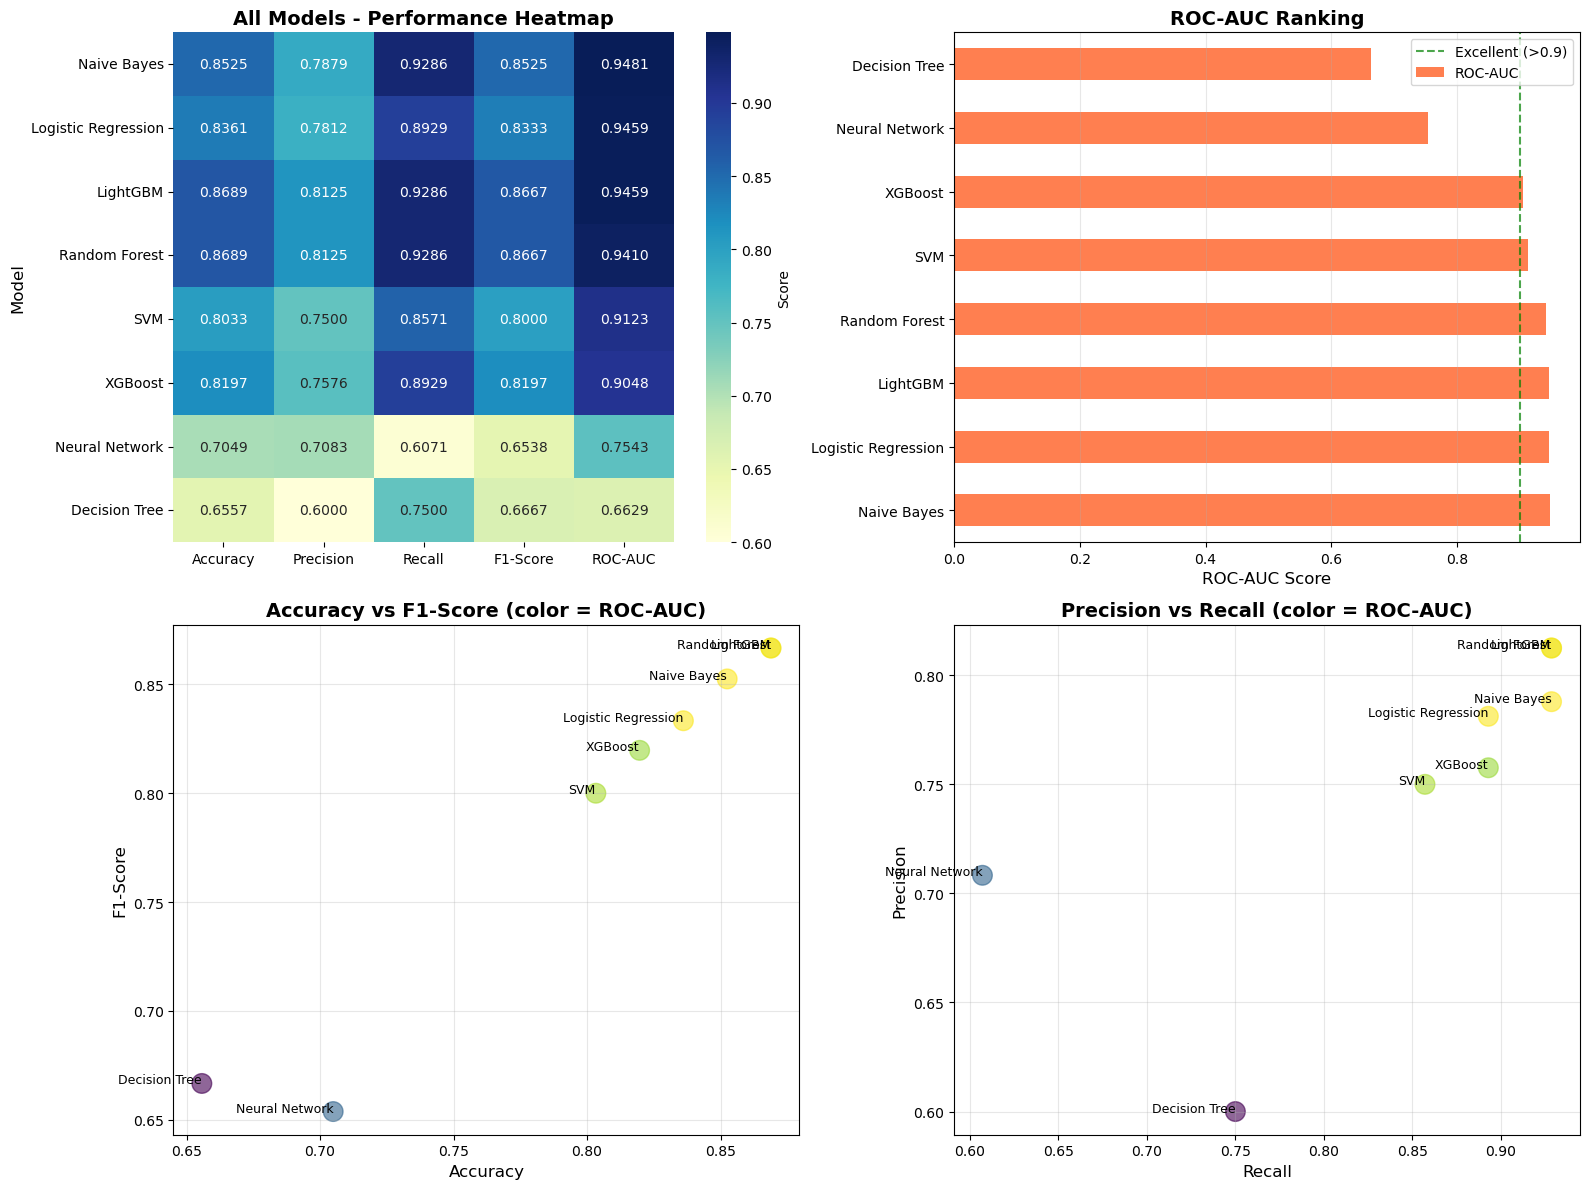


🏆 TOP 3 MODELS:
1. Naive Bayes: ROC-AUC = 0.9481
2. Logistic Regression: ROC-AUC = 0.9459
3. LightGBM: ROC-AUC = 0.9459


In [4]:
# Visualize comprehensive comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: All metrics heatmap
sns.heatmap(results_df, annot=True, fmt='.4f', cmap='YlGnBu', ax=axes[0, 0], cbar_kws={'label': 'Score'})
axes[0, 0].set_title('All Models - Performance Heatmap', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Model', fontsize=12)

# Plot 2: ROC-AUC ranking
results_df['ROC-AUC'].plot(kind='barh', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('ROC-AUC Ranking', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('ROC-AUC Score', fontsize=12)
axes[0, 1].axvline(x=0.9, color='green', linestyle='--', alpha=0.7, label='Excellent (>0.9)')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Accuracy vs F1-Score
axes[1, 0].scatter(results_df['Accuracy'], results_df['F1-Score'], s=200, alpha=0.6, c=results_df['ROC-AUC'], cmap='viridis')
for idx, model in enumerate(results_df.index):
    axes[1, 0].annotate(model, (results_df.iloc[idx]['Accuracy'], results_df.iloc[idx]['F1-Score']), 
                        fontsize=9, ha='right')
axes[1, 0].set_xlabel('Accuracy', fontsize=12)
axes[1, 0].set_ylabel('F1-Score', fontsize=12)
axes[1, 0].set_title('Accuracy vs F1-Score (color = ROC-AUC)', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Precision vs Recall
axes[1, 1].scatter(results_df['Recall'], results_df['Precision'], s=200, alpha=0.6, c=results_df['ROC-AUC'], cmap='viridis')
for idx, model in enumerate(results_df.index):
    axes[1, 1].annotate(model, (results_df.iloc[idx]['Recall'], results_df.iloc[idx]['Precision']), 
                        fontsize=9, ha='right')
axes[1, 1].set_xlabel('Recall', fontsize=12)
axes[1, 1].set_ylabel('Precision', fontsize=12)
axes[1, 1].set_title('Precision vs Recall (color = ROC-AUC)', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🏆 TOP 3 MODELS:")
for i, model in enumerate(results_df.index[:3], 1):
    print(f"{i}. {model}: ROC-AUC = {results_df.loc[model, 'ROC-AUC']:.4f}")

/opt/anaconda3/envs/medical_ai/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


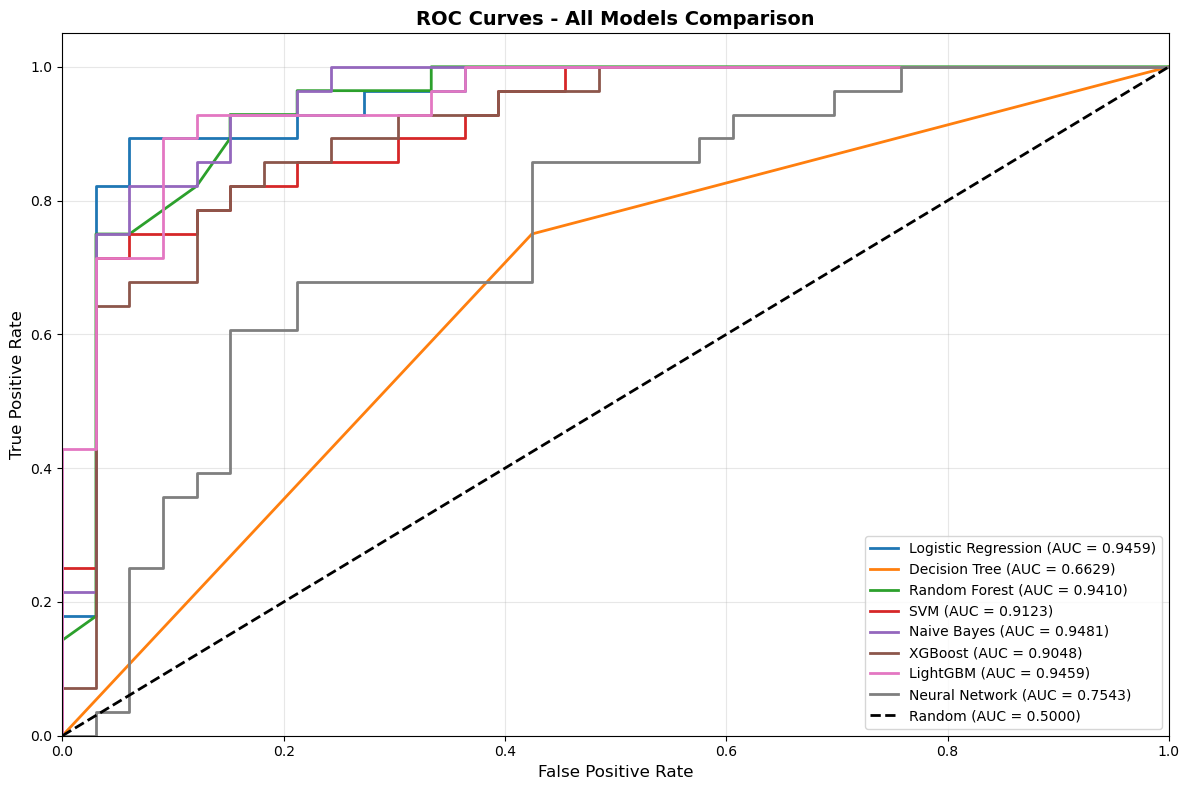


✓ ROC curves generated for all models


In [5]:
# Plot ROC curves for all models
plt.figure(figsize=(12, 8))

for name, model in all_models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.5000)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ ROC curves generated for all models")